# Clustering with K-Means of spatial data with Harvesian Distance

## Functions

##### LIBS!

In [36]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.cluster import DBSCAN
import math
import matplotlib.pyplot as plt

In [107]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

##### Importing data(lat,long coordinates) - of all "Others"

In [31]:
df = pd.read_excel(r'C:\Users\KARICB\OneDrive - Magenta Austria\KMeans\complete_df.xlsx')
df=df[df['Betreiber']!='Drei']
df=df[df['Betreiber']!='MTI']
df=df.iloc[:10000]

X=df.loc[:,['COORD_Y','COORD_X']]
points= np.array(X)
print(points)

[[48.065495  16.124893 ]
 [48.071013  16.145918 ]
 [47.589275   9.714959 ]
 ...
 [48.1414032 13.0153656]
 [48.102562  13.016102 ]
 [48.109626  12.936668 ]]


##### Calculating distance between retail stores via the Haversine matrix formula

In [2]:
def distance(origin, destination): 
    lat1, lon1 = origin[0],origin[1]
    lat2, lon2 = destination[0],destination[1]
    radius = 6371 # km
    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d

#### Creating Clusters with K-Means

In [3]:
def create_clusters(number_of_clusters,points):    
    kmeans = KMeans(n_clusters=number_of_clusters, random_state=0).fit(points)    
    id_label=kmeans.labels_    
    l_array = np.array([[label] for label in kmeans.labels_])
    clusters = np.append(points,l_array,axis=1)
    return clusters

#### Getting cluster centroids

In [4]:
def cluster_centroids(number_of_clusters,points):
    number_of_clusters=9300
    
    kmeans = KMeans(n_clusters=number_of_clusters, random_state=0).fit(points)
    
    id_label=kmeans.labels_    
    l_array = np.array([[label] for label in kmeans.labels_])
    clusters = np.append(points,l_array,axis=1)
    centroids = kmeans.cluster_centers_
    return clusters,centroids

## Code Application

In [46]:
df = pd.read_excel(r'C:\Users\KARICB\OneDrive - Magenta Austria\KMeans\complete_df.xlsx')

In [47]:
df=df[df['Betreiber']!='Drei']

In [48]:
df=df[df['Betreiber']!='MTI']

In [49]:
df=df[["COORD_Y","COORD_X","Betreiber"]]

In [18]:
#df.head(2)

,COORD_Y,COORD_X,Betreiber
13278,48.065495,16.124893,Other
13279,48.071013,16.145918,Other


In [32]:
create_clusters(9300,points)

array([[  48.065495 ,   16.124893 , 1893.       ],
       [  48.071013 ,   16.145918 ,  739.       ],
       [  47.589275 ,    9.714959 ,  588.       ],
       ...,
       [  48.1414032,   13.0153656, 2755.       ],
       [  48.102562 ,   13.016102 , 2091.       ],
       [  48.109626 ,   12.936668 , 2215.       ]])

In [67]:
df['PK']=df['COORD_Y'].astype(str)+df['COORD_X'].astype(str)

In [83]:
weigh=df.groupby('PK').count().reset_index()

In [86]:
tot=pd.merge(df,weigh[['PK','Betreiber']], how='left',left_on='PK',right_on='PK')

In [87]:
tot

,COORD_Y,COORD_X,Betreiber_x,PK,Betreiber_y
0,48.065495,16.124893,Other,48.06549516.124893,1
1,48.071013,16.145918,Other,48.07101316.145918,1
2,47.589275,9.714959,Other,47.5892759.714959,1
3,48.203354,16.388168,Other,48.20335416.388168,1
4,48.203030,16.389198,Other,48.2030316.389198,1
...,...,...,...,...,...
166023,48.236056,16.464672,Other,48.23605616.464672,1
166024,48.236029,16.464952,Other,48.2360289999999916.464952,1
166025,48.236140,16.464977,Other,48.2361416.464977,1
166026,47.626175,12.204997,Other,47.62617512.204997,1


In [88]:
tot.rename(columns = {'Betreiber_x':'Betreiber','Betreiber_y':'COUNT'}, inplace = True)

In [191]:
tot_small=tot.iloc[:]

In [192]:
tot_small

,COORD_Y,COORD_X,Betreiber,PK,COUNT
0,48.065495,16.124893,Other,48.06549516.124893,1
1,48.071013,16.145918,Other,48.07101316.145918,1
2,47.589275,9.714959,Other,47.5892759.714959,1
3,48.203354,16.388168,Other,48.20335416.388168,1
4,48.203030,16.389198,Other,48.2030316.389198,1
...,...,...,...,...,...
166023,48.236056,16.464672,Other,48.23605616.464672,1
166024,48.236029,16.464952,Other,48.2360289999999916.464952,1
166025,48.236140,16.464977,Other,48.2361416.464977,1
166026,47.626175,12.204997,Other,47.62617512.204997,1


In [194]:
kmeans = KMeans(n_clusters=9350, random_state=0).fit(tot_small[['COORD_X','COORD_Y']],sample_weight=tot_small['COUNT'])
  

In [195]:
y=kmeans.predict(tot_small[['COORD_X','COORD_Y']],sample_weight=tot_small['COUNT'])

In [196]:
len(y)

166028

In [197]:
centers=kmeans.cluster_centers_

In [198]:
len(centers)

9350

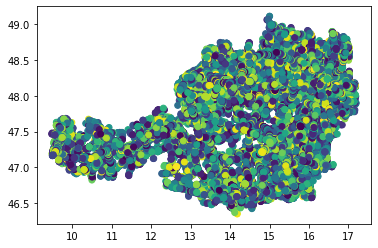

In [199]:
plt.scatter(tot_small['COORD_X'],tot_small['COORD_Y'], c=y, cmap='viridis')

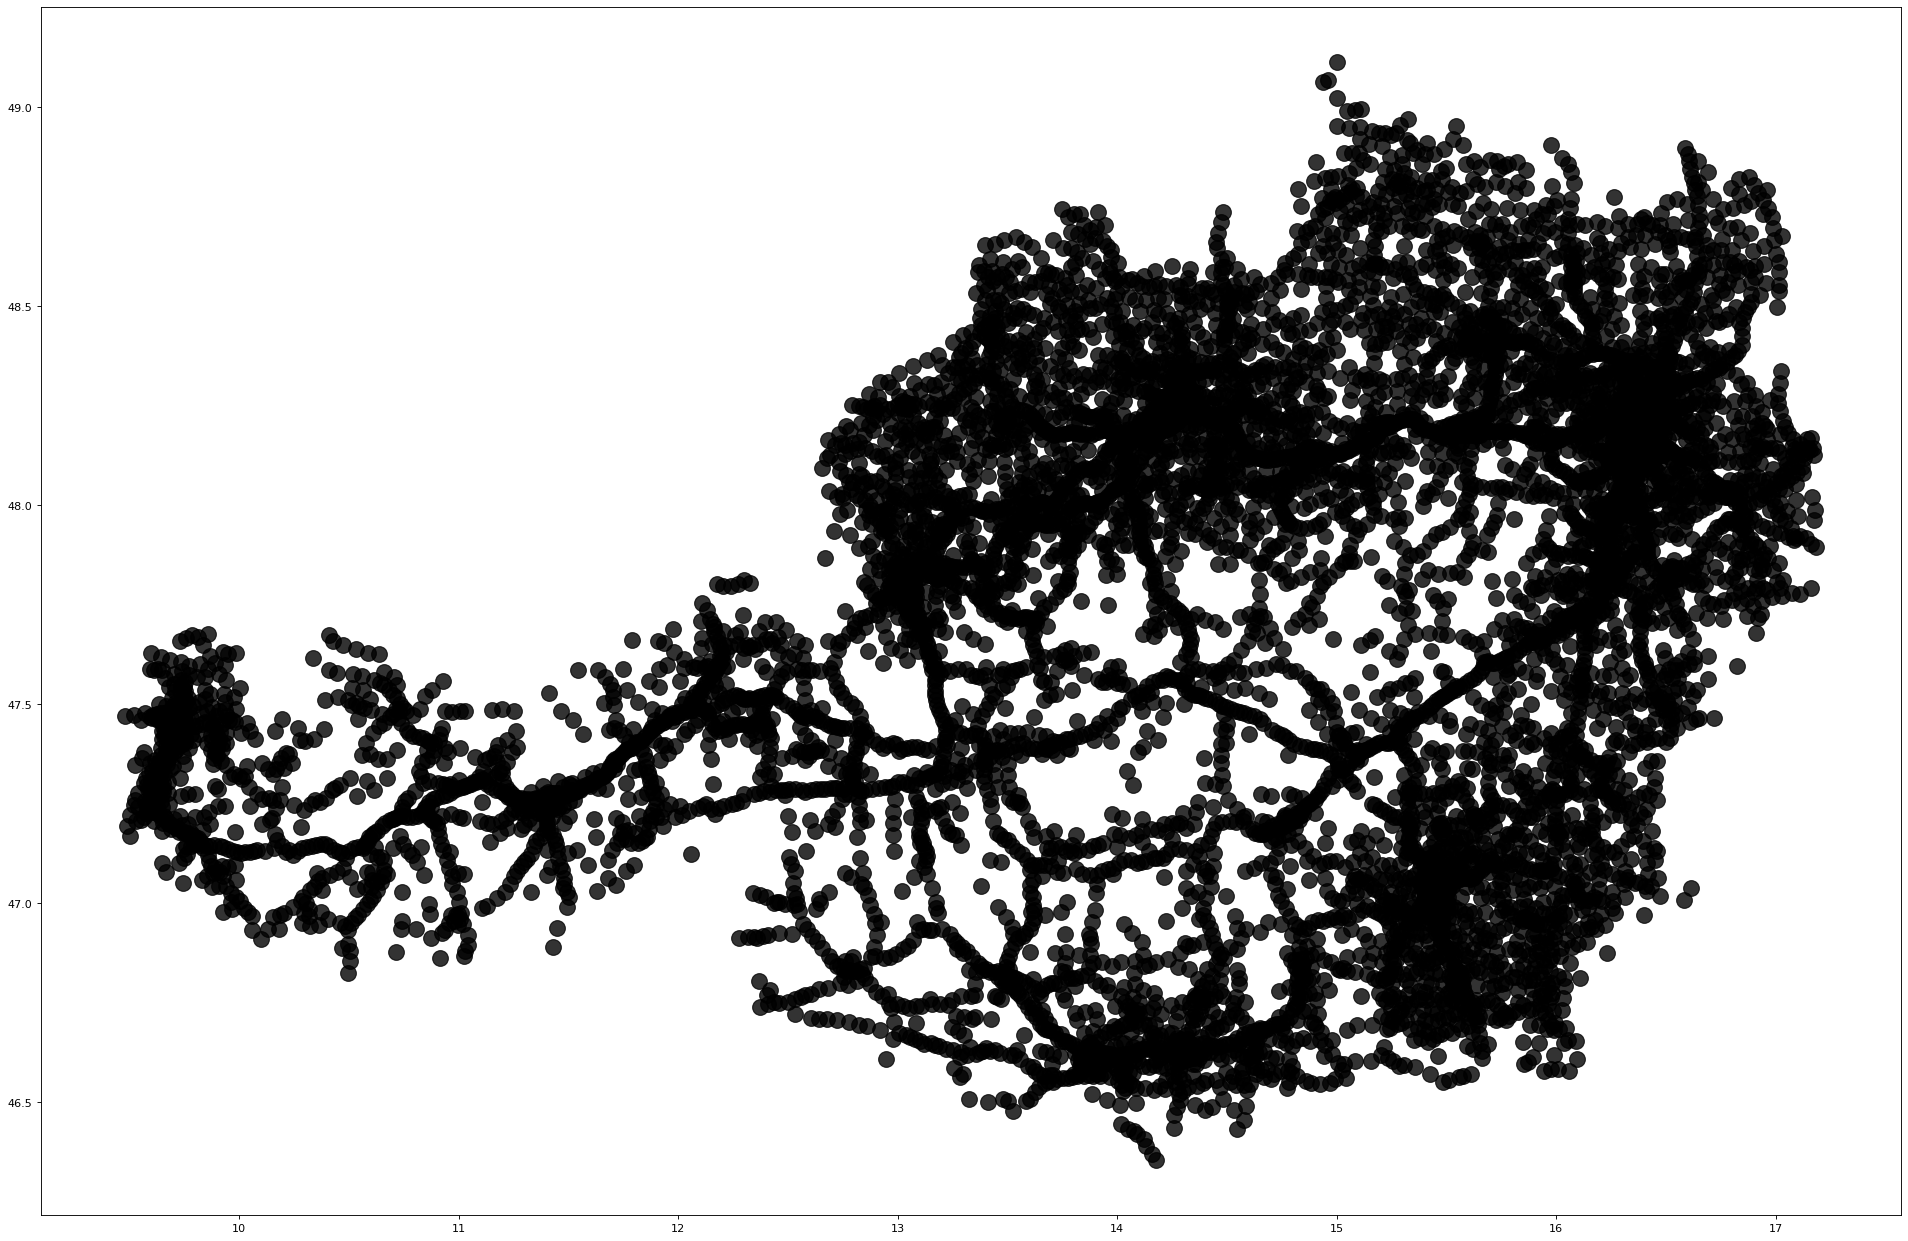

In [211]:
figure(figsize=(30, 20), dpi=80)
plt.scatter(centers[:,0],centers[:,1], c='black', s=200, alpha=0.8)

In [201]:
centers

array([[16.54842655, 47.72927597],
       [13.01398016, 47.82458029],
       [10.48794933, 47.11416744],
       ...,
       [14.85986507, 48.11744613],
       [14.33927229, 46.71331584],
       [14.0610815 , 48.00650567]])

In [203]:
cols=['COORD_X','COORD_Y']

In [204]:
df=pd.DataFrame(data=centers,columns =cols)
df

,COORD_X,COORD_Y
0,16.548427,47.729276
1,13.013980,47.824580
2,10.487949,47.114167
3,14.781888,47.211865
4,14.439699,48.063116
...,...,...
9345,14.596020,48.276196
9346,13.694600,46.568341
9347,14.859865,48.117446
9348,14.339272,46.713316


In [212]:
df.to_excel(r"C:\Users\KARICB\OneDrive - Magenta Austria\KMeans\KMeans_weighted.xlsx")

In [213]:
from scipy.stats import gaussian_kde

In [214]:
density = gaussian_kde(tot_small['COUNT'])

In [215]:
density.covariance_factor = lambda : .9 #Smoothing parameter

In [216]:
x_vals = np.linspace(-5,10,500)

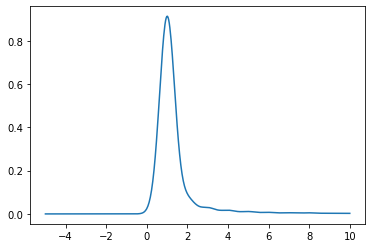

In [217]:
plt.plot(x_vals,density(x_vals))
plt.show()

In [223]:
tot[tot['COUNT']>30]

,COORD_Y,COORD_X,Betreiber,PK,COUNT
1543,47.439651,9.756546,Other,47.4396514892589.7565460205078,55
1858,47.439651,9.756546,Other,47.4396514892589.7565460205078,55
1859,47.439651,9.756546,Other,47.4396514892589.7565460205078,55
1885,47.439651,9.756546,Other,47.4396514892589.7565460205078,55
1960,47.439651,9.756546,Other,47.4396514892589.7565460205078,55
...,...,...,...,...,...
162428,47.875401,15.366732,Other,47.87540115.366732,34
162429,47.875401,15.366732,Other,47.87540115.366732,34
162430,47.875401,15.366732,Other,47.87540115.366732,34
162431,47.875401,15.366732,Other,47.87540115.366732,34
